# Installing require packages

In [1]:
# !pip install librosa
# !pip install matplotlib
# !pip install numpy

## Importing packages

In [2]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
from IPython.display import Audio

## Loading the audio
Here the `y` is the **data** and `sr` is **sample rate**

In [3]:
y, sr = librosa.load('mars_audio.wav', sr=2500)

## Displaying the audio with `IPython.display`

In [4]:
Audio(data=y, rate=sr)

### The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.
The `librosa.amplitude_to_db` converts an amplitude spectrogram to dB-scaled spectrogram.

In [5]:
data = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(data), ref=np.max)

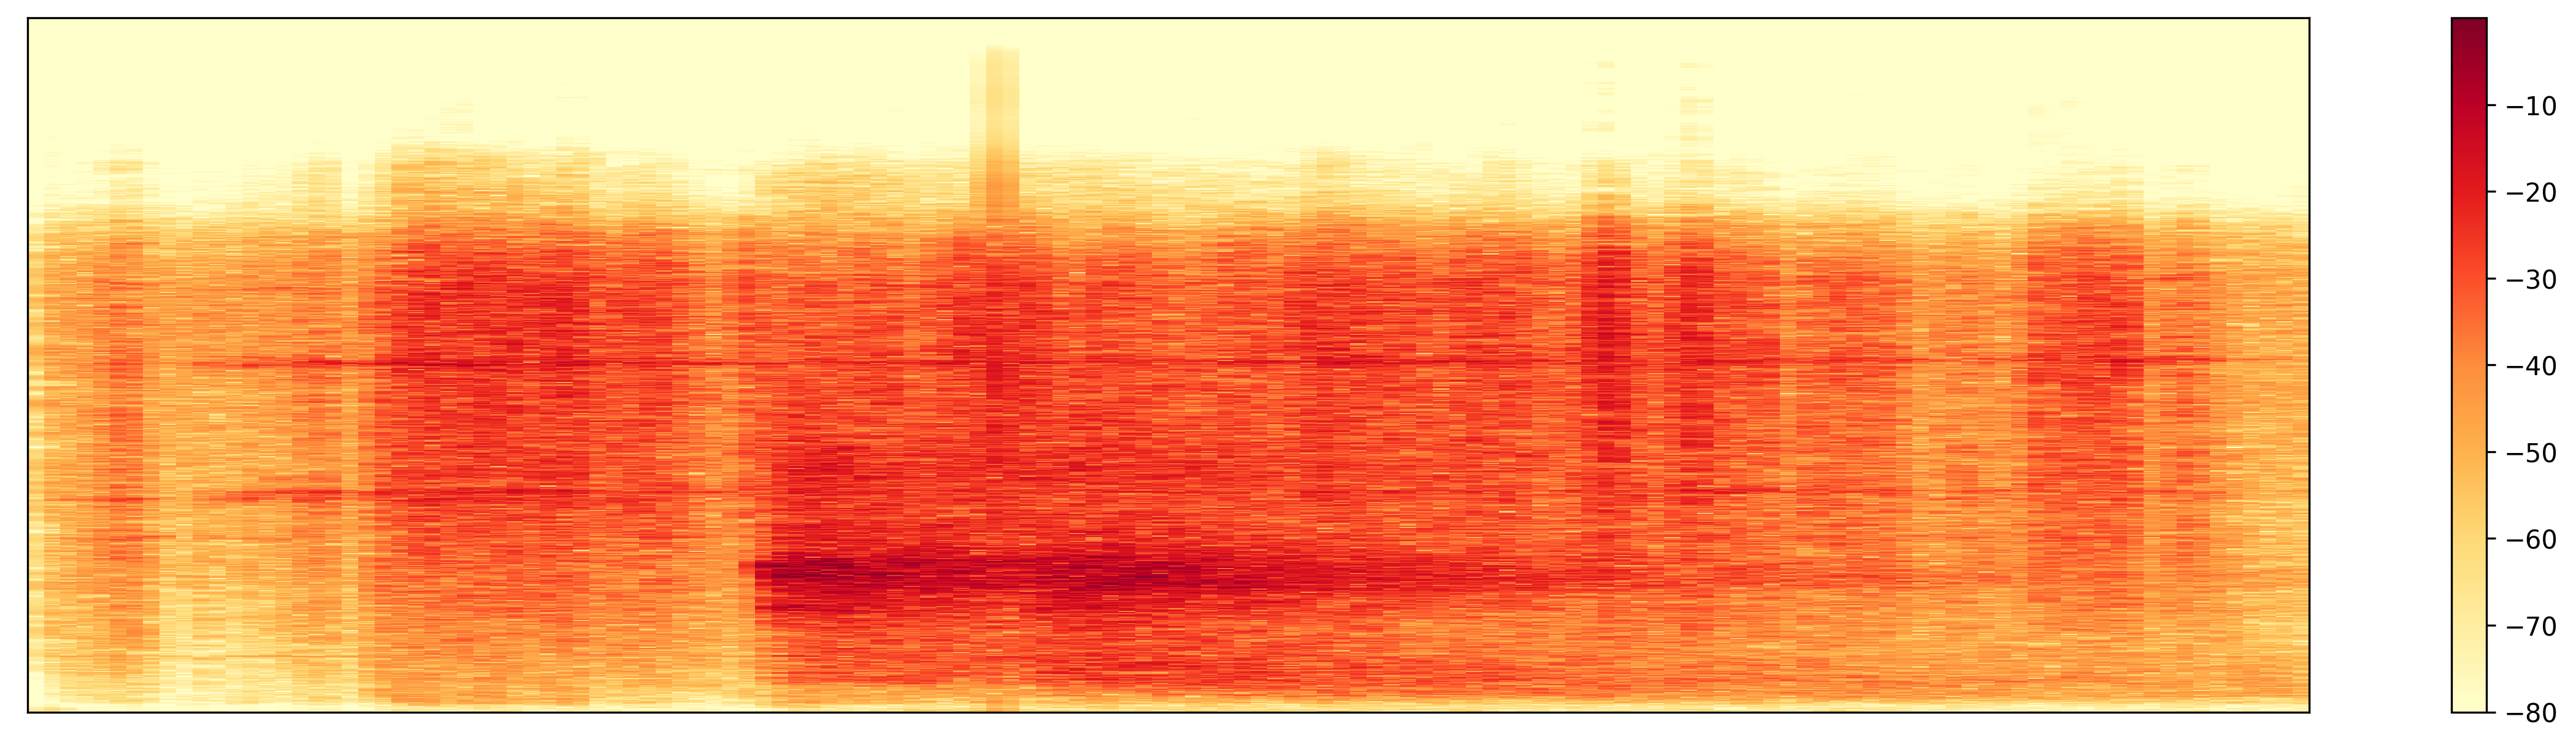

In [6]:
plt.figure(figsize=(20, 5), dpi=300)
librosa.display.specshow(S_db, cmap='YlOrRd')
plt.colorbar()

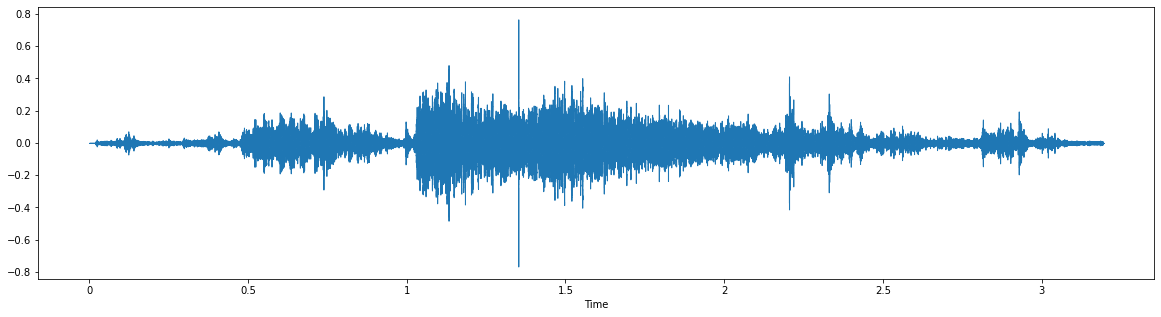

In [7]:
plt.rcParams["figure.figsize"] = (20,5)
librosa.display.waveshow(y)

## Time to convert the low resolution spectogram to a high resolution one with a predefined hop length and fast fourier transformation

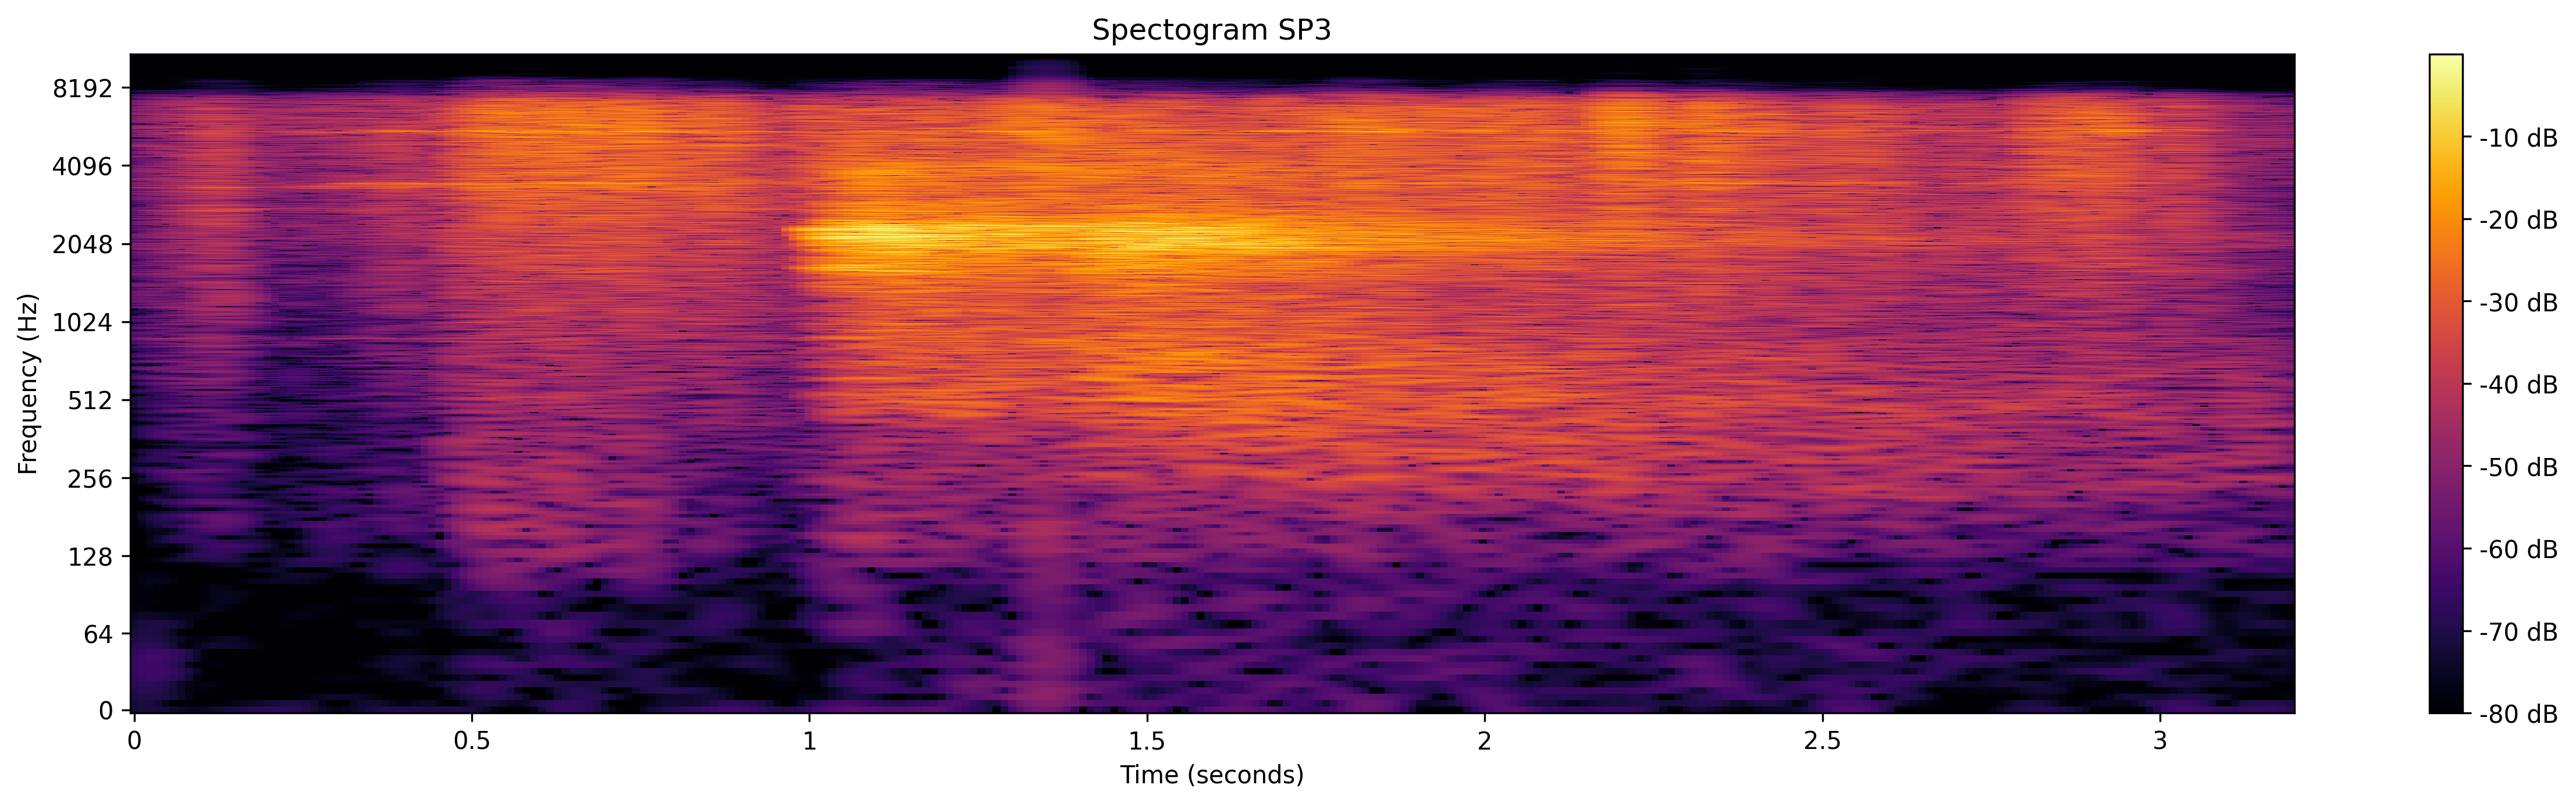

In [8]:
fig, ax = plt.subplots(figsize=(20, 5), dpi=300)
D_highres = librosa.stft(y, hop_length=256, n_fft=4096)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, hop_length=256, x_axis='time', y_axis='log', ax=ax, cmap='inferno')
ax.set(title='Spectogram SP3', xlabel='Time (seconds)', ylabel='Frequency (Hz)')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.savefig("Spectogram.png", bbox_inches ="tight", pad_inches = 1)